In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyvista as pv
import torch
import seaborn as sns
from os import listdir
from os.path import isfile, join
import multiprocessing
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import dataframe_image as dfi

In [2]:
mypath = '../../data/MLgSA/New_wss/'
onlyfiles = np.asarray([f for f in listdir(mypath) if isfile(join(mypath, f))])
onlyfiles.sort()
print(len(onlyfiles))
# short_list = np.asarray([s[5:23] if s[19] == 'l' else s[5:24] for s in onlyfiles])

30


In [3]:
onlyfiles

array(['data_patient_m_002_left_wss.vtu',
       'data_patient_m_002_right_wss.vtu',
       'data_patient_m_004_left_wss.vtu',
       'data_patient_m_004_right_wss.vtu',
       'data_patient_m_006_left_wss.vtu',
       'data_patient_m_012_right_wss.vtu',
       'data_patient_m_013_left_wss.vtu',
       'data_patient_m_014_left_wss.vtu',
       'data_patient_m_014_right_wss.vtu',
       'data_patient_m_015_right_wss.vtu',
       'data_patient_m_017_left_wss.vtu',
       'data_patient_m_017_right_wss.vtu',
       'data_patient_m_021_left_wss.vtu',
       'data_patient_m_021_right_wss.vtu',
       'data_patient_m_022_left_wss.vtu',
       'data_patient_m_022_right_wss.vtu',
       'data_patient_m_023_left_wss.vtu',
       'data_patient_m_023_right_fluid_wss.vtu',
       'data_patient_m_024_left_wss.vtu',
       'data_patient_m_024_right_wss.vtu',
       'data_patient_m_025_right_wss.vtu',
       'data_patient_m_026_left_wss.vtu',
       'data_patient_m_027_left_wss.vtu',
       'data_pati

In [3]:
meshes = []

for f in onlyfiles:
    reader = pv.get_reader(mypath + f)
    meshes.append(reader.read())

In [7]:
l = meshes[0].array_names

In [17]:
meshes[0][l[0]]

pyvista_ndarray([[94.21795903, 97.818246  , 92.62252495, ...,
                   0.9732404 ,  1.0468807 ,  1.03821609]])

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
std = StandardScaler()
rs = RobustScaler()

In [9]:
mm.fit(meshes[0][l[0]].reshape(1, -1))
meshes[0][l[0]] = mm.transform(meshes[0][l[0]].reshape(1, -1)).reshape(-1, )

In [10]:
meshes[0]

UnstructuredGrid (0x7fafa8ccdd00)
  N Cells:    25645
  N Points:   12956
  X Bounds:   2.188e+01, 3.790e+01
  Y Bounds:   -9.832e+00, 9.916e+00
  Z Bounds:   -4.188e+02, -3.635e+02
  N Arrays:   4

(12956,)
(12956, 1)


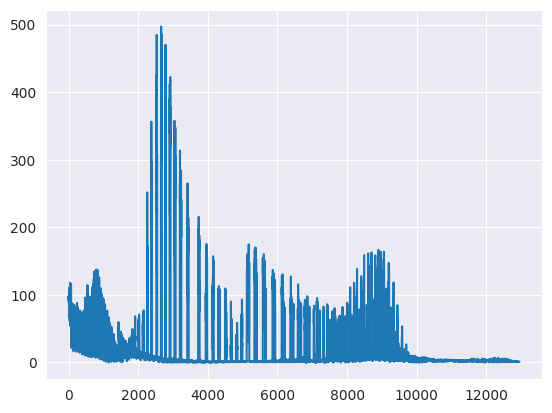

In [11]:
data1 = meshes[0][l[1]]
print(data1.shape)
data = meshes[0][l[1]].reshape(-1, 1)
print(data.shape)
mm.fit(data)
d11 = mm.transform(data)
plt.plot(data1)

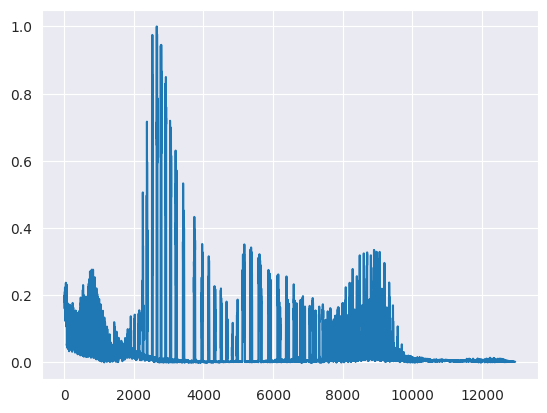

In [12]:
plt.plot(d11)

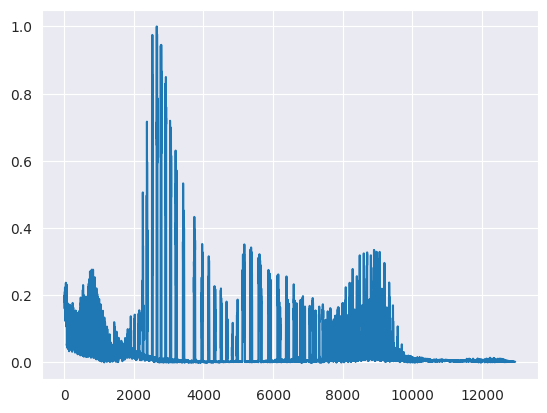

In [16]:
d2 = mm.fit_transform(data)
plt.plot(d2)

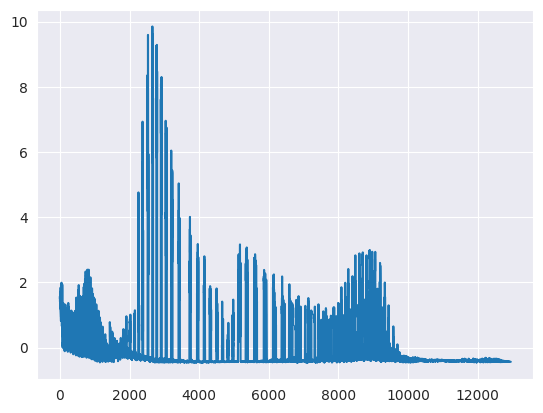

In [13]:
d3= std.fit_transform(data)
plt.plot(d3)

(array([10963.,  1316.,   386.,   121.,    39.,    28.,    33.,    37.,
           22.,    11.]),
 array([1.17445850e-02, 4.97372242e+01, 9.94627037e+01, 1.49188183e+02,
        1.98913663e+02, 2.48639142e+02, 2.98364622e+02, 3.48090102e+02,
        3.97815581e+02, 4.47541061e+02, 4.97266540e+02]),
 <BarContainer object of 10 artists>)

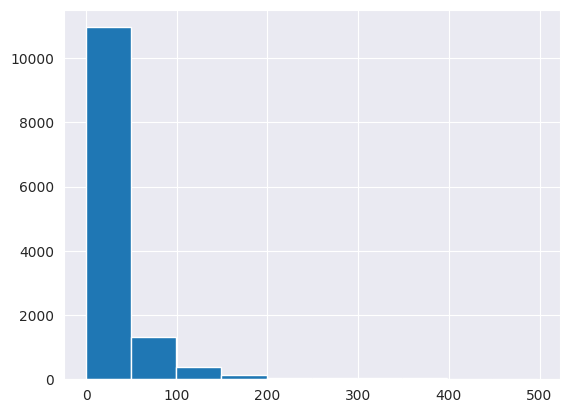

In [14]:
plt.hist(data)

(array([10963.,  1316.,   386.,   121.,    39.,    28.,    33.,    37.,
           22.,    11.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

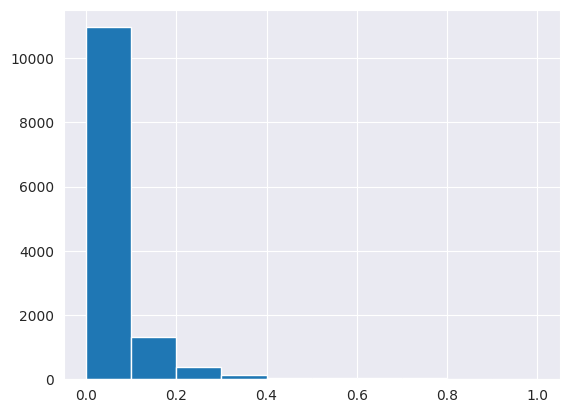

In [17]:
plt.hist(d2)

(array([10963.,  1316.,   386.,   121.,    39.,    28.,    33.,    37.,
           22.,    11.]),
 array([-0.45904854,  0.57183428,  1.60271711,  2.63359993,  3.66448275,
         4.69536557,  5.7262484 ,  6.75713122,  7.78801404,  8.81889686,
         9.84977969]),
 <BarContainer object of 10 artists>)

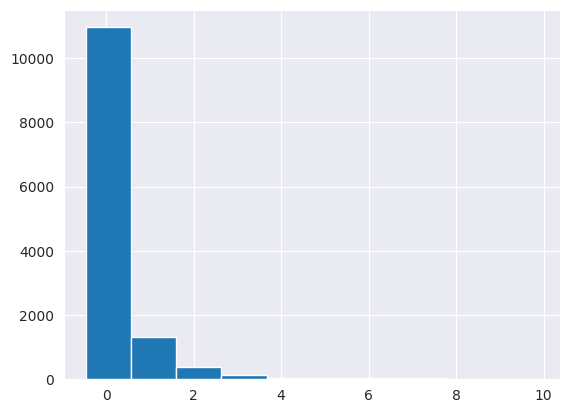

In [18]:
plt.hist(d3)

In [129]:
d2 = mm.transform(data).reshape(-1, )
d3 = std.transform(data).reshape(-1,)
d4 = rs.transform(data).reshape(-1,)
print(d2.shape)
print(np.min(d2), max(d2))

ValueError: X has 1 features, but StandardScaler is expecting 12956 features as input.

 ...]

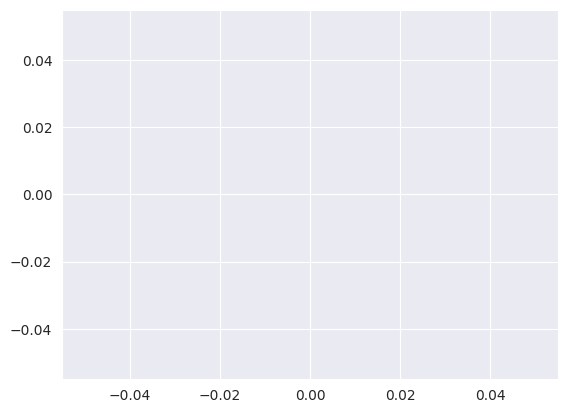

In [84]:
plt.plot(d2)

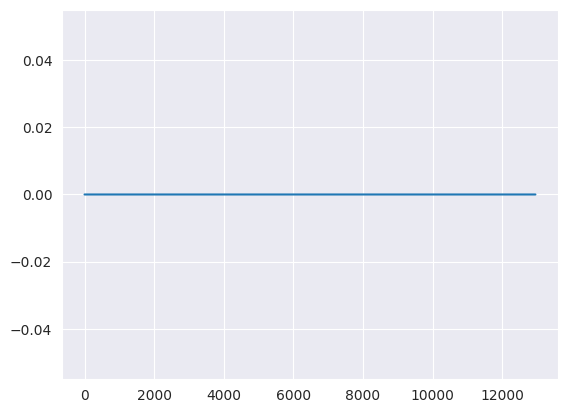

In [38]:
plt.plot(d3)

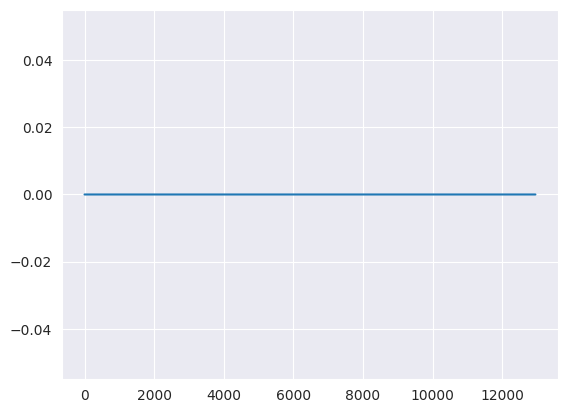

In [39]:
plt.plot(d4)

In [124]:
def minmaxer(d, a=None, b=None):
    if a is None and b is None:
        a = np.min(d)
        b = np.max(d)
    return (d-a) * 2/(b-a) - 1

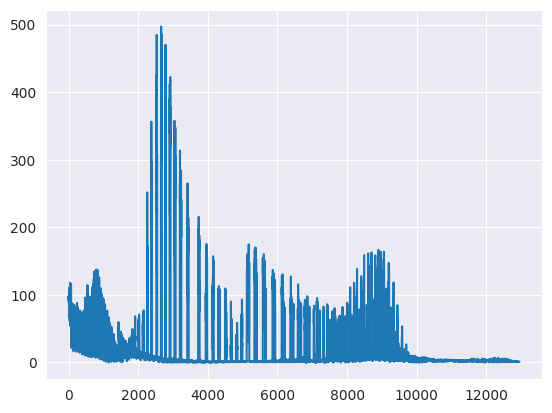

In [125]:
data1 = meshes[0][l[1]]
plt.plot(data1)

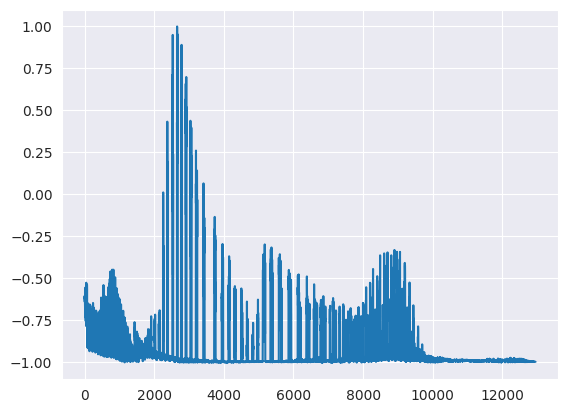

In [126]:
data1n = minmaxer(data1)
plt.plot(data1n)

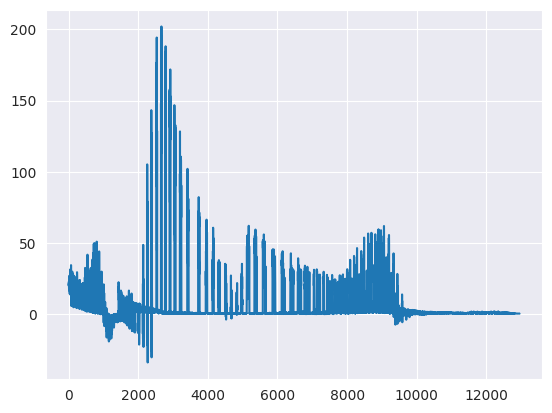

In [113]:
data2 = meshes[0][l[2]]
plt.plot(data2)

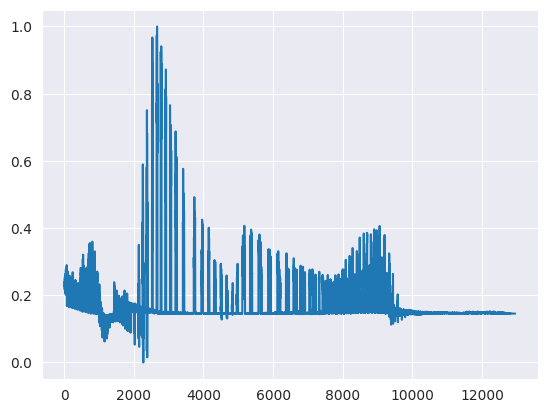

In [114]:
data2n = minmaxer(data2)
plt.plot(data2n)

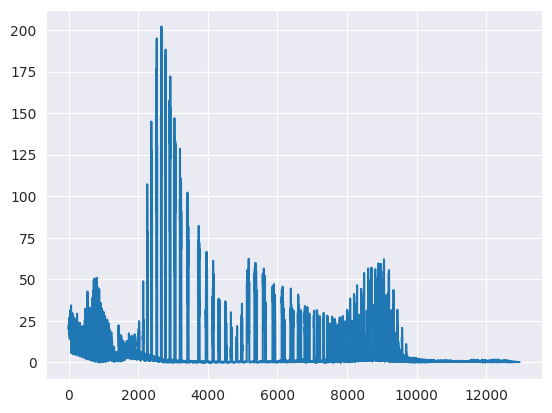

In [115]:
data3 = meshes[0][l[3]]
plt.plot(data3)

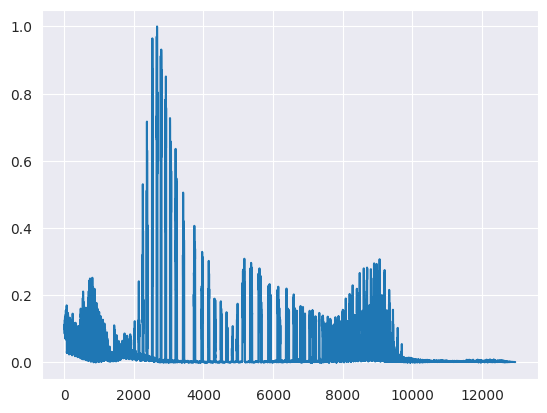

In [116]:
data3n = minmaxer(data3)
plt.plot(data3n)

In [120]:
dd = np.union1d(np.union1d(data1, data2), data3)

In [121]:
a = np.min(dd)
b = np.max(dd)

In [122]:
print(a, b)

-34.07959498675044 497.2665402834726


In [10]:
pl = pv.Plotter()
pl.add_mesh(mesh, scalars='non-directional_WSS_@_t=1.1')
pl.show_bounds()
pl.show()

NameError: name 'mesh' is not defined